<a href="https://colab.research.google.com/github/kyk29718/LangTrans/blob/main/Trash_Type_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'trash-type-detection:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3863866%2F6707832%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240213%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240213T045952Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D78dc8df9fd2bb3f3fc87f243ab8668ac647e07021cbc1e3267d88cd30953178cba1e7c842cda679fd4c131d2f6aec8d151caf077e63470d53ca715a1d3433886ecf50684fde421a05a4a6b358f871280ab2d621af9e750d0ccc9656abfe24f9648e0996a8dbd98da5d2d2442e5f794f9ea1e0ac8372a4b594cda125f8a07606be0108522bd5b6de6b8e6abf28e6ec01f3dfd7a84385aba06e9dce0d8936f3aef71e386d4e40f94881165f5bf5e53fc7f372f23b11186a5d3cfd651329175376415259c195e13f40483c5554354f745cb4801b8683f5a020e1502d78b445de39facc5edac4e5788e09089ff3785e9023e5134de4c5d493f52ee7d9878ce8bb0f7'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 42813821 bytes downloaded
Downloaded and uncompressed: trash-type-detection
Data source import complete.


<h2 style="font-family:camtasia;
          font-size:320%;
          font-weight: bold;
          color: #029db9;
          text-shadow: 2px 2px 2px rgba(0, 0, 0, 0.3);
          text-align:center;
          margin: 0 auto;
          padding:10px; ">
        Trash Type Detection usnig CNN
    </h2>

<div style="max-width: 100%;">
  <img src="https://lepageandsons.com/wp-content/uploads/2021/04/Garbage-Depositphotos_180449132_xl-2015-1210x423.jpg" style="width: 100%; height: auto;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">
</div>

<a id="tc"></a>
       
<p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);
          background-size: 40% auto;
          font-family:camtasia;
          font-size:300%;
          font-weight: bold;
          color: #ffffff;
          text-align:center;
          text-shadow: 0px 0px 10px #000000;
          margin: 0 auto;
          border-radius:10px;
          padding:15px;
          box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">
        Table of Content
    </p>

<a id="contents_tabel"></a>

<div style="border-radius: 10px; padding: 15px; background-color: #d1f9ff; font-size: 100%; text-align: left;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5); ">

* <a href="#import" style="color: #208b9f; text-decoration: none;">Step 1 | Import Libraries</a>
* <a href="#read" style="color: #208b9f; text-decoration: none;">Step 2 | Reading Files</a>
* <a href="#gen" style="color: #208b9f; text-decoration: none;">Step 3 | Generate Data</a>
* <a href="#tt" style="color: #208b9f; text-decoration: none;">Step 4 | Split Train & Test Files</a>
* <a href="#arch" style="color: #208b9f; text-decoration: none;">Step 5 | Network Architecture</a>
* <a href="#compiler" style="color: #208b9f; text-decoration: none;">Step 6 | Compiler</a>
* <a href="#train" style="color: #208b9f; text-decoration: none;">Step 7 | Train Model</a>
* <a href="#evaluate" style="color: #208b9f; text-decoration: none;">Step 8 | Model Evaluation</a>
* <a href="#use" style="color: #208b9f; text-decoration: none;">Step 9 | using Model</a>

<a id="import"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740); background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px; padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 1 | Import Libraries</p>

In [2]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.utils as utils
from   tensorflow.keras.preprocessing.image import ImageDataGenerator
from   tensorflow.keras.models import Sequential
from   tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, ZeroPadding2D
from   tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from   tensorflow.keras.utils import plot_model
from   tensorflow.keras.callbacks import ModelCheckpoint
from   pathlib import Path
from   tensorflow.keras import models, layers, optimizers
from   sklearn.utils.class_weight import compute_class_weight


In [4]:
warnings.filterwarnings("ignore")

📄 [Back to Tabel of Contents](#tc)
<a id="read"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 2 | Reading Files</p>

In [5]:
data_path = '/kaggle/input/trash-type-detection/trash_images'

In [6]:
# Data Classes
print(os.listdir(data_path))

['plastic', 'cardboard', 'metal', 'trash', 'paper', 'glass']


In [7]:
main_folder_path = Path(data_path)

all_folders = [d for d in main_folder_path.glob('**/') if d.is_dir()]

# Count number of files in each class
data = []
for folder in all_folders:
    folder_name = folder.name
    file_count = len(list(folder.glob('*.*')))
    if folder_name != data_path:
        data.append({'Folder Name': folder_name, 'File Count': file_count})

count = pd.DataFrame(data)

count = count.set_index('Folder Name')
count

,File Count
Folder Name,
trash_images,0
plastic,482
cardboard,403
metal,410
trash,137
paper,594
glass,501


In [8]:
print(f'Total {count.sum()}')

Total File Count    2527
dtype: int64


In [9]:
# Show five image of each class
def plot_imgs(item_dir, top=10):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:5]

    plt.figure(figsize=(10, 10))

    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)

        img = plt.imread(img_path)
        plt.tight_layout()
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(os.path.basename(item_dir))

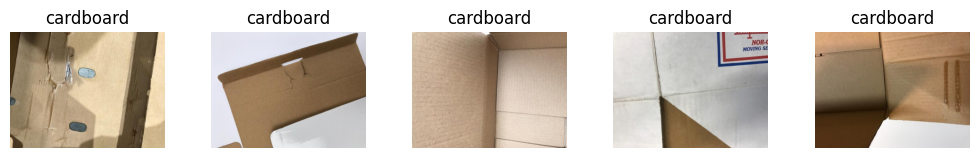

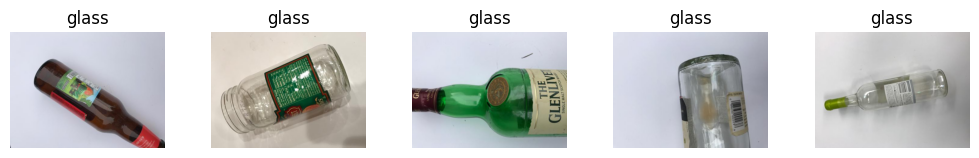

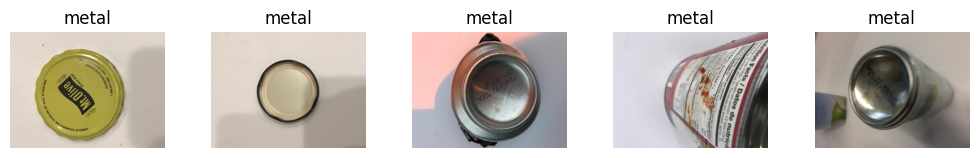

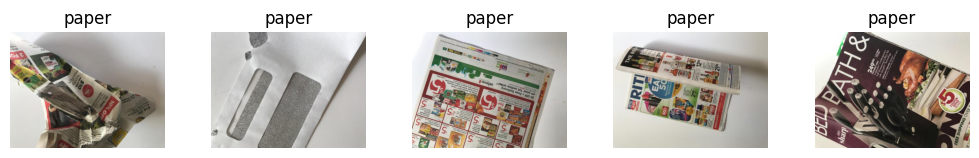

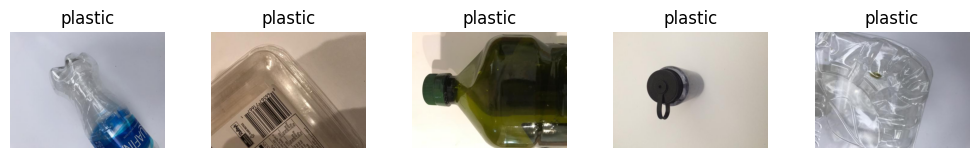

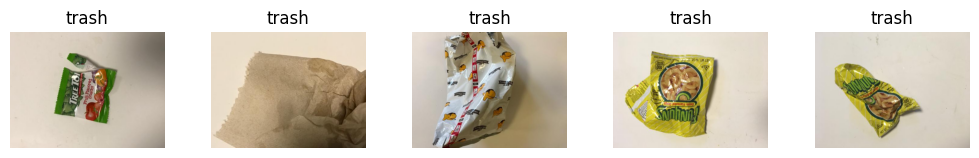

In [10]:
plot_imgs(data_path+'/cardboard')
plot_imgs(data_path+'/glass')
plot_imgs(data_path+'/metal')
plot_imgs(data_path+'/paper')
plot_imgs(data_path+'/plastic')
plot_imgs(data_path+'/trash')

📄 [Back to Tabel of Contents](#tc)
<a id="gen"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 3 | Generate Data</p>

In [11]:
# Define variable for requirements
batch_size = 30
target_size = (180, 180)
validation_split = 0.15

In [12]:
# Data Generators
train_img_generator = ImageDataGenerator(rescale=1./255,
                                         validation_split=validation_split,
                                         horizontal_flip=True,
                                         vertical_flip=True,
                                         zoom_range = 0.5,
                                         width_shift_range = 0.3,
                                         height_shift_range = 0.3,
                                         rotation_range=50,
                                         shear_range = 0.3,
                                         fill_mode='nearest'
                                        )

test_data_img_generator = ImageDataGenerator(rescale=1./255,
                                             validation_split=validation_split
                                            )

📄 [Back to Tabel of Contents](#tc)
<a id="tt"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 4 | Split Train & Test Files</p>

In [13]:
# Separate train Data
train_data = train_img_generator.flow_from_directory(data_path,
                                                        subset="training",
                                                        seed=133,
                                                        target_size=target_size,
                                                        batch_size=batch_size,
                                                        class_mode='categorical',
                                                        color_mode='rgb',
                                                       )

Found 2150 images belonging to 6 classes.


In [14]:
# Separate validation Data
test_data = test_data_img_generator.flow_from_directory(data_path,
                                                        subset="validation",
                                                        seed=133,
                                                        target_size=target_size,
                                                        batch_size=batch_size,
                                                        class_mode='categorical',
                                                        color_mode='rgb',
                                                       )

Found 377 images belonging to 6 classes.


📄 [Back to Tabel of Contents](#tc)
<a id="arch"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 5 | Network Architecture</p>

In [15]:
model = Sequential()
model.add(ZeroPadding2D(padding=(1, 1), input_shape=(target_size[0], target_size[1], 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Dropout(0.3))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.3))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Dropout(0.4))
model.add(MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))

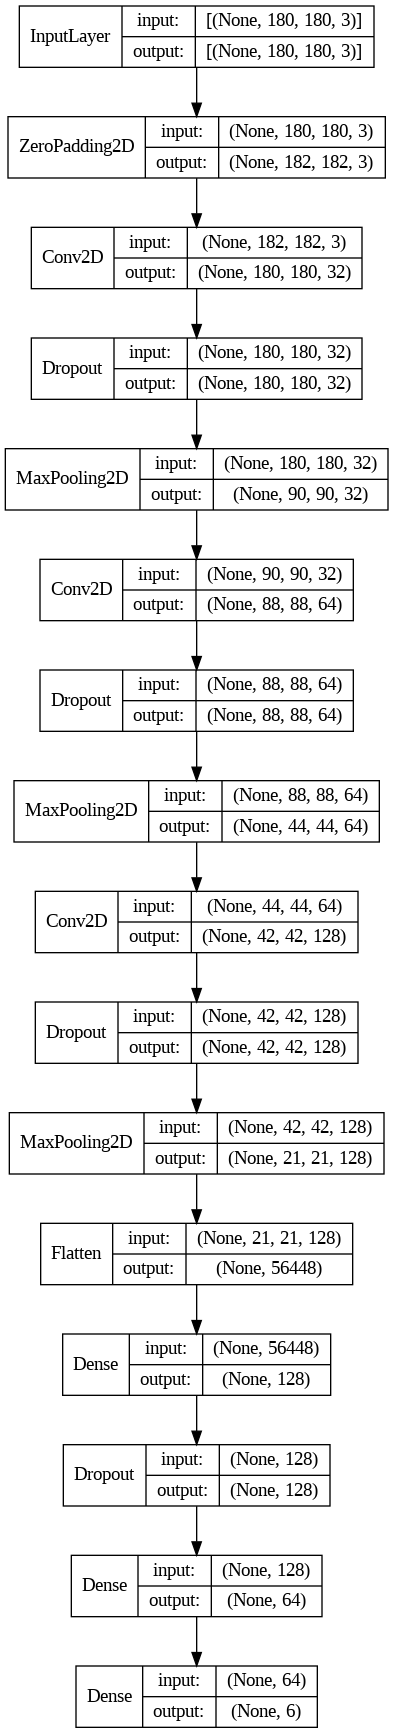

In [16]:
plot_model(model, show_shapes=True, show_layer_names=False)

📄 [Back to Tabel of Contents](#tc)
<a id="compiler"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 6 | Compiler</p>

In [17]:
ES = EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [18]:
RLROP = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.1, min_lr=0.01)

In [19]:
MCH = ModelCheckpoint('trash.h5', monitor='val_loss', mode='min', save_best_only=True)

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()]
             )

📄 [Back to Tabel of Contents](#tc)
<a id="train"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 7 | Train Model</p>

In [22]:
history = model.fit(train_data,
                    steps_per_epoch=len(train_data),
                    epochs=5,
                    validation_data=test_data,
                    validation_steps=len(test_data),
                    callbacks=[ES, RLROP, MCH]
                   )

Epoch 1/5
72/72 [==============================] - 236s 3s/step - loss: 1.6756 - categorical_accuracy: 0.2684 - val_loss: 1.7402 - val_categorical_accuracy: 0.2520 - lr: 0.0010
Epoch 2/5
72/72 [==============================] - 230s 3s/step - loss: 1.6855 - categorical_accuracy: 0.2735 - val_loss: 1.6875 - val_categorical_accuracy: 0.3687 - lr: 0.0010
Epoch 3/5
72/72 [==============================] - 234s 3s/step - loss: 1.5682 - categorical_accuracy: 0.3447 - val_loss: 1.5336 - val_categorical_accuracy: 0.3873 - lr: 0.0010
Epoch 4/5
72/72 [==============================] - 234s 3s/step - loss: 1.5126 - categorical_accuracy: 0.3767 - val_loss: 1.4711 - val_categorical_accuracy: 0.4721 - lr: 0.0010
Epoch 5/5
72/72 [==============================] - 232s 3s/step - loss: 1.4449 - categorical_accuracy: 0.4033 - val_loss: 1.4631 - val_categorical_accuracy: 0.4271 - lr: 0.0010


📄 [Back to Tabel of Contents](#tc)
<a id="evaluate"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 8 | Model Evaluation</p>

In [23]:
best_score = max(history.history['val_categorical_accuracy'] )
print(f"Best Validation score is: {best_score}")

Best Validation score is: 0.4721485376358032


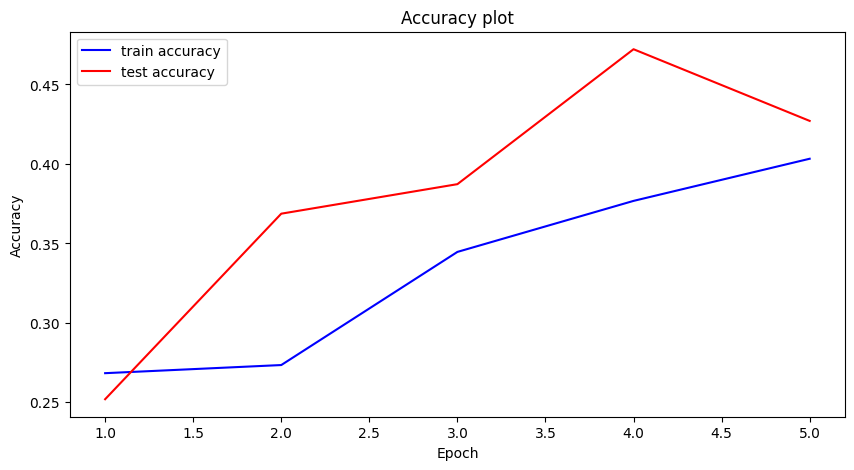

In [24]:
# Accuracy on train data :
accuracy = history.history['categorical_accuracy']

# Accuracy on test data :
val_accuracy = history.history['val_categorical_accuracy']
epochs = range(1, len(accuracy) + 1)  # Epochs

# Accuracy line plot :
plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy, 'b', label='train accuracy')
plt.plot(epochs, val_accuracy, 'r', label='test accuracy')
plt.title('Accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend();

📄 [Back to Tabel of Contents](#tc)
<a id="use"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 9 |  Using Model</p>

In [25]:
classes = train_data.class_indices
classes

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

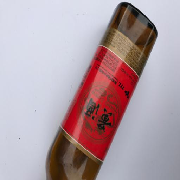

In [26]:
img = utils.load_img(
    "/kaggle/input/trash-type-detection/trash_images/glass/glass_020.jpg",
    grayscale=False,
    color_mode='rgb',
    target_size=(180, 180),
    interpolation='nearest',
    keep_aspect_ratio=False
)

img

In [28]:
img = utils.img_to_array(img)
img = img / 255.0    # Normalize the image

result = model.predict(tf.expand_dims(img, axis=0))

classes = train_data.class_indices

for key, value in classes.items():
    if value == np.argmax(result):
        print("glass")

1/1 [==============================] - 0s 45ms/step
glass


<a id="contents_tabel"></a>

<div style="border-radius: 10px; padding: 15px; background-color: #d1f9ff; font-size: 100%; text-align: left;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5); ">

You are welcome to try out the application built on this model :<br>    
    https://github.com/F-Mirfeizi/Trash-Detector